Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# MTH793P - Coursework 6-1

This is a template notebook for the computational exercises of Coursework 6, part **1/2** of the module MTH793P, Advanced machine learning. Closely follow the instructions in this template in order to complete the assessment and to obtain full marks. For the submitted notebook, please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions.

In this part we will see how to compress an image using SVD.

In [2]:
### 
### Required imports
###

import numpy as np
from skimage.data import astronaut
import matplotlib.pyplot as plt

from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

%matplotlib inline

Write a function called **<font color='red'>low_rank</font>** that takes a matrix **<font color='red'>M</font>** and a desired rank **<font color='red'>k</font>**, and returns the best approximation for **M** by a rank **k** matrix.

In [118]:
# from scipy.sparse.linalg import eigs - eigs less effedctive on large matrices failing to find all evalues
from numpy.linalg import eig
from sklearn.preprocessing import normalize

def low_rank(M, k):
    
    M_shape = M.shape
    
    U = np.zeros((M_shape[0], M_shape[0]))
    sigma = np.zeros((M_shape[0], M_shape[1]))
    V = np.zeros((M_shape[1], M_shape[1]))
    
    eigen_vals_vecs_MMT = eig(M @ M.T)
    eigen_vals_vecs_MTM = eig(M.T @ M)
    
    # High to low eigenvalues indices
    high_to_low_MMT = np.flip(np.argsort(eigen_vals_vecs_MMT[0].real))
    high_to_low_MTM = np.flip(np.argsort(eigen_vals_vecs_MTM[0].real))
    
    # Iterate highest to lowest upto kth value and take sqrt eigenvalue
    for i in range(k):
        sigma[i][i] = np.sqrt(eigen_vals_vecs_MMT[0][high_to_low_MMT[i]].real)
    
    if(M_shape[0] >= M_shape[1]):
    # Create eigenvector matrices U and V
        for i in range(len(eigen_vals_vecs_MMT[0])):
            eig_vec_index_MMT = high_to_low_MMT[i]
            U[:,i] = eigen_vals_vecs_MMT[1][:,eig_vec_index_MMT]
            if i <= M_shape[1]-1:
                V.T[i] = eigen_vals_vecs_MMT[1][eig_vec_index_MMT] @ M
        V = normalize(V, axis = 1)
    
    
    elif(M_shape[1] >= M_shape[0]):
        for i in range(len(eigen_vals_vecs_MTM[0])):
            eig_vec_index_MTM = high_to_low_MTM[i]
            V[:,i] = eigen_vals_vecs_MTM[1][:,eig_vec_index_MTM]
            if i <= M_shape[0]-1:
                U[:,i] = M @ V[:,i]
        U = normalize(U, axis = 0)
    
    return U @ sigma @ V.T

#raise NotImplementedError()

You can test your function here.

In [117]:
M_test = np.array([[1,2,3,4,5],[2,1,4,8,6],[4,3,9,7,0],[9,6,7,0,4]])
RES_1 = np.array([[2.86857743, 2.06491829, 3.94694634, 2.96630631, 2.2093186 ],
 [4.16199092, 2.99596973, 5.72658581, 4.30378478, 3.20547872],
 [5.08125229, 3.65769132, 6.99142017, 5.25436424, 3.91347469],
 [5.13050671, 3.69314665, 7.05919054, 5.3052967,  3.95140941]])
RES_2 = np.array([[1.53453369, 1.23343206, 3.6644173,  4.80655923, 2.75253225],
 [1.30411594, 1.21470602, 5.12133379, 8.24609389, 4.36918622],
 [4.54434172, 3.32304432, 6.87771114, 5.99500805, 4.13210106],
 [8.72653271, 5.93448704, 7.8207711,  0.34474168, 2.48713178]])

M_1 = low_rank(M_test,1)
M_2 = low_rank(M_test,2)

assert_almost_equal(RES_1, M_1)
assert_almost_equal(RES_2, M_2)

### DO NOT EDIT THIS CELL ###

We load the image of Eileen Collins into a variable named **<font color='red'>image</font>**.<br>
The image is 512x512 pixels, stored as a 512x512x3 matrix (3 colour channels).

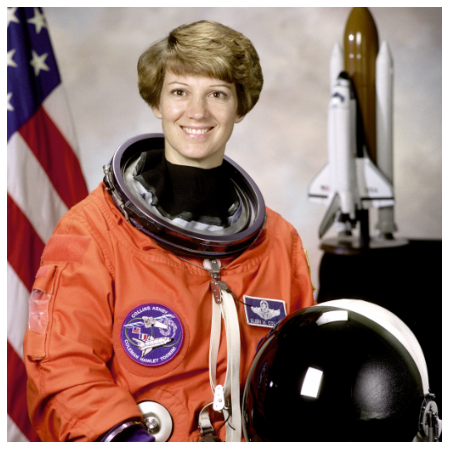

In [104]:
image = astronaut()
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off') ;

Next, you should separate the image into the three colour channels (RGB).<br>
Also, make sure that the values are scaled to be between 0 and 1 (instead of 0 to 255).<br>
Name the results **<font color='red'>image_R</font>**, **<font color='red'>image_G</font>**, and **<font color='red'>image_B</font>**.

In [105]:
image_R = image[:,:,0].reshape(512,512,1)/255
image_G = image[:,:,1].reshape(512,512,1)/255
image_B = image[:,:,2].reshape(512,512,1)/255

#raise NotImplementedError()

We present the three colour channels.

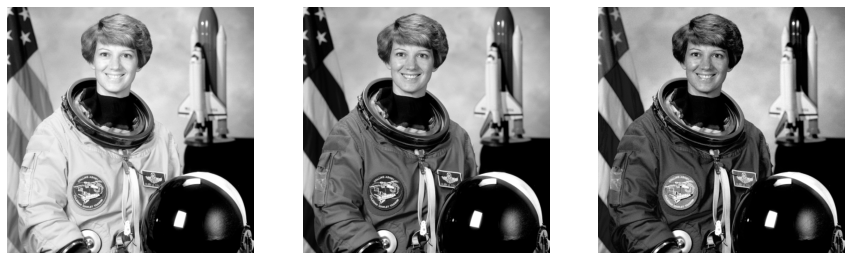

In [106]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(image_R, cmap='gray')
plt.axis('off') ;

plt.subplot(1,3,2)
plt.imshow(image_G, cmap='gray')
plt.axis('off') ;

plt.subplot(1,3,3)
plt.imshow(image_B, cmap='gray')
plt.axis('off') ;

Compute the **singular values** for each of the channels separately.<br>
Read carefully the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to see what are the input and output variables.<br>
Store the results in **<font color='red'>SR</font>**, **<font color='red'>SG</font>**, **<font color='red'>SB</font>**.

We plot the singular values of all three channels (regular, and log-log).


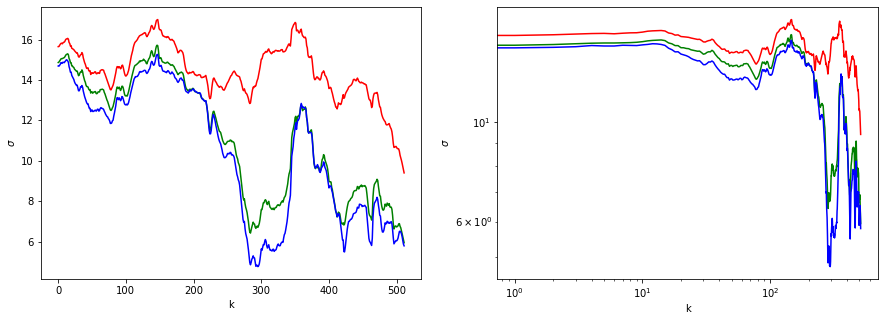

In [107]:
from numpy.linalg import svd

_, SR, _ = svd(image_R, full_matrices=True)
_, SG, _ = svd(image_G, full_matrices=True)
_, SB, _ = svd(image_B, full_matrices=True)
#raise NotImplementedError()

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(SR, 'r')
plt.plot(SG, 'g')
plt.plot(SB, 'b')
plt.xlabel('k')
plt.ylabel('$\sigma$')

plt.subplot(1, 2, 2)
plt.loglog(SR, 'r')
plt.loglog(SG, 'g')
plt.loglog(SB, 'b')
plt.xlabel('k')
plt.ylabel('$\sigma$');

In [108]:
### DO NOT REMOVE/EDIT THIS CELL ###

Recall that the Frobenius norm of a matrix $M$ is
$$ \|M\|_F = \sqrt{\sum_{i,j} M_{ij}^2} = \sqrt{\sum_i \sigma_i^2},$$
where $\sigma_i$ are the singular values of $M$.

Our goal is to compress the image by finding a lower rank approximation. In order to assess the quality of the compressed image we can use the ratio of the Frobenius norm between the compressed image and the original one. Let $M_k$ be the approximation of $M$ by a rank-$k$ matrix. 

Define
$$ \rho_k(M) = \frac{\| M_k\|_F}{\|M\|_F}.$$

Compute the values of $\rho_k(M)$ for $M=$ **image_R,image_G,image_B** (k=1,...,512).<br>
Place the results in **<font color='red'>rho_R</font>**, **<font color='red'>rho_G</font>**, **<font color='red'>rho_B</font>**.

**HINT:** use np.cumsum.

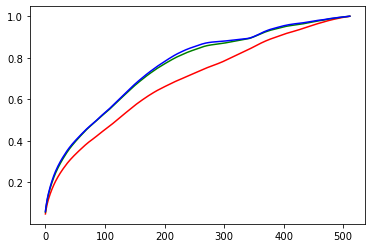

In [109]:
from numpy.linalg import norm

rho_R = np.sqrt(np.cumsum(SR**2))/norm(image_R)
# norm(image_R) same as np.sqrt(np.cumsum(SR**2))[-1]
rho_G = np.sqrt(np.cumsum(SG**2))/norm(image_G)
rho_B = np.sqrt(np.cumsum(SB**2))/norm(image_B)

#raise NotImplementedError()

plt.plot(rho_R, 'r')
plt.plot(rho_G, 'g')
plt.plot(rho_B, 'b');

We want to compress the image, and control the loss of quality.<br>
Find the smallest rank $k$ required (per channel), to achieve $\rho_k >= \text{QUALITY}$.<br>
Store the resulting ranks in **<font color='red'>k_R</font>**, **<font color='red'>k_G</font>**, **<font color='red'>k_B</font>**.

In [110]:
QUALITY = 0.999

In [111]:
k_R = next(index for index, val in enumerate(rho_R) if val >= QUALITY)
k_G = next(index for index, val in enumerate(rho_G) if val >= QUALITY)
k_B = next(index for index, val in enumerate(rho_B) if val >= QUALITY)
#raise NotImplementedError()

print([k_R, k_G, k_B])

[509, 508, 508]


In [112]:
### DO NOT REMOVE/EDIT THIS CELL ###

Compress each of the channels separately, using the **low_rank** function you wrote before.<br> Use **k_R,k_G,k_B** that you found above, as the input. Store the results in **<font color='red'>low_R</font>**, **<font color='red'>low_G</font>**, **<font color='red'>low_B</font>**.<br>

Use **np.clip** to make sure that the resulting matrices contain values between 0 and 1 (so they can be presented properly as an image). 

In [119]:
low_R = low_rank(image_R.reshape(512,512), 512).reshape(512,512,1)
print(image_R[0][0])
print(low_R[0][0])
#low_G = np.clip(low_rank(image_G.reshape(512,512), 509), 0, 1)
#low_B = np.clip(low_rank(image_B.reshape(512,512), 509), 0, 1)
#raise NotImplementedError()

[0.60392157]
[-0.78041016]


In [114]:
### DO NOT REMOVE/EDIT THIS CELL ###

We present the three compressed channels, and the resulting compressed coloured image.

ValueError: could not broadcast input array from shape (512,512,1) into shape (512,512)

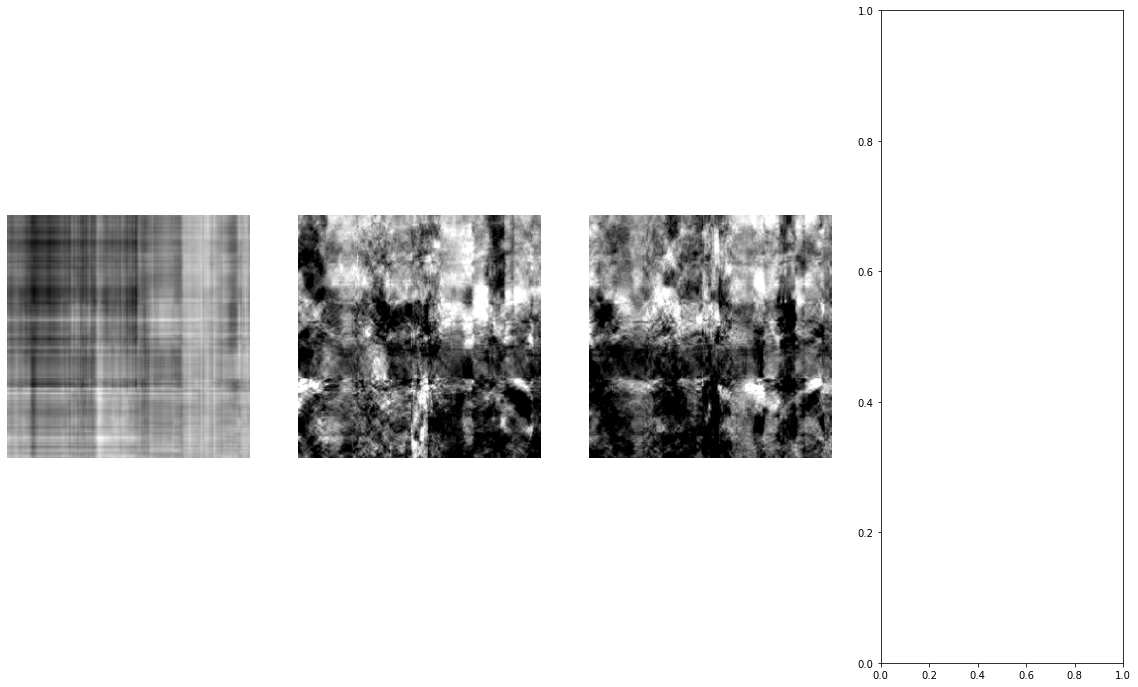

In [115]:
plt.figure(figsize=(20,12))

plt.subplot(1,4,1)
plt.imshow(low_R, cmap='gray')
plt.axis('off') ;
plt.subplot(1,4,2)
plt.imshow(low_G, cmap='gray')
plt.axis('off') ;
plt.subplot(1,4,3)
plt.imshow(low_B, cmap='gray')
plt.axis('off') ;

plt.subplot(1,4,4)
low_im = np.zeros(image.shape)
low_im[:,:,0] = low_R
low_im[:,:,1] = low_G
low_im[:,:,2] = low_B
plt.imshow(low_im)
plt.axis('off') ;

Write a function **<font color='red'>compression_rate</font>** that computes the compression of an image using the low-rank approximation.
The inputs are:

* **<font color='red'>IMH / IMV</font>** - horizontal/vertical size of the image (in pixels).
* **<font color='red'>KR / KG / KB</font>** - the lower rank for each channel.

The output of this function should be the ratio $N_{\text{original}}/N_{\text{compressed}}$, where $N_{\text{original}}$ is the total number of values needed to store the original image (flat, no SVD), and and $N_{\text{compressed}}$ is the total number of values needed to be stored using our low-rank representation.
 

In [ ]:
def compression_rate(IMH, IMV, KR, KG, KB):
# YOUR CODE HERE
raise NotImplementedError()

You can test your function here:

In [ ]:
r_test = compression_rate(123, 456, 7, 8, 9)
RES = 12.087931034482759

assert_almost_equal(RES, r_test)

### DO NOT EDIT THIS CELL ###

Compute the compression rate for the image you produced above. Place the reuslt in **<font color='red'>c_rate</font>**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

print('The compression rate for k_R = %d, k_G = %d, k_B = %d, is: %0.3f' % (k_R, k_G, k_B, c_rate) )

Finally, we will present a sample of various low-rank versions, together with the compression level achieved.<br>
The list **<font color='red'>KS</font>** contains the different ranks we want to check.<br>
Inside the loop, place the low-rank channels in **<font color='red'>low_R</font>**, **<font color='red'>log_G</font>**, **<font color='red'>low_B</font>** (don't forget to clip the values). <br>
Also - compute the compression rate, and store it in **<font color='red'>c_rate</font>**.

In [ ]:
KS = [1, 2, 5, 10, 25, 50, 100]
NK = len(KS)

plt.figure(figsize=(15,30))
c = 0

for K in KS:
    ##########
    # YOUR CODE HERE
    raise NotImplementedError()
    ##########

    plt.subplot(NK,4,c*4+1)
    plt.imshow(low_R, cmap='gray')
    plt.axis('off') ;
    plt.subplot(NK,4,c*4+2)
    plt.imshow(low_G, cmap='gray')
    plt.axis('off') ;
    plt.subplot(NK,4,c*4+3)
    plt.imshow(low_B, cmap='gray')
    plt.axis('off') ;

    plt.subplot(NK,4,c*4+4)
    low_im = np.zeros(image.shape)
    low_im[:,:,0] = low_R
    low_im[:,:,1] = low_G
    low_im[:,:,2] = low_B
    plt.imshow(low_im)
    plt.axis('off') ;
    plt.title('%0.3f' % c_rate)
    c = c+1
